# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [192]:
import pandas as pd
# load data
dataset = pd.read_csv('files/Housing_Price.csv')

which are categorical and which are numerical features?

In [238]:
# you can print and analyse the data type to say about categorical features

################# we can consider the features which are in strings to be categorical.
################# When going through the feature_discription.txt, we can see that all of the features which
################# aren't integers need to converted into numerical forms and all of them have features which arent
################# correlated to each other hence categorical.
categorical_features = [c for c in dataset.columns if dataset[c].dtypes == 'object']
non_categorical_features = [c for c in dataset.columns if dataset[c].dtypes != 'object']

Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [241]:

def onehot_encoding(df,columns):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    df = pd.get_dummies(df,prefix=columns,prefix_sep='_',columns=columns)
    return df

onehot_encoded_dataset = onehot_encoding(dataset , categorical_features)
onehot_encoded_dataset = onehot_encoded_dataset.drop(columns = ['Id']) ########### This feature is unnecessary

Seperate the Label from the data, here it is 'SalePrice'

In [242]:
# Write your code here

price = onehot_encoded_dataset['SalePrice']
onehot_encoded_dataset = onehot_encoded_dataset.drop(columns = ['SalePrice'])

In [243]:
# Visualize the changed dataframe
onehot_encoded_dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Po,HeatingQC_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,1,0,0,0,1
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,1
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,1,0,0,0,0,0,0,1
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,1,0,0,0,0,0,0,1
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,1,0,0,0,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [244]:
# Split data here 
import numpy as np
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(onehot_encoded_dataset,price , test_size = 0.2 , random_state = 42)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [245]:
# import your Libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

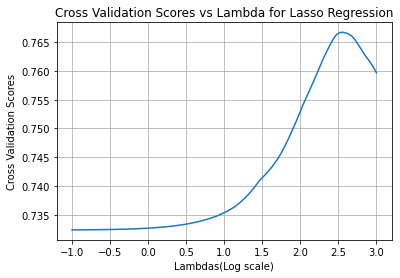

Max Validation score for lambda : 359.3813663804629


In [217]:
# write your code here and plot lambda vs cross validation score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

alphas = np.logspace(-1,3,100)
cross_val_scores_avg_list = []

for a in alphas :
    lasso_reg = Lasso(a , max_iter = 1e5)
    score = cross_val_score(lasso_reg, X_train, y_train, cv=5)
    cross_val_scores_avg_list.append(score.mean())
plt.figure(0)
plt.plot(np.linspace(-1,3,100),cross_val_scores_avg_list)
plt.grid()
plt.xlabel('Lambdas(Log scale)')
plt.ylabel('Cross Validation Scores')
plt.title('Cross Validation Scores vs Lambda for Lasso Regression')
plt.show()

opt_alpha_lasso = alphas[cross_val_scores_avg_list.index(max(cross_val_scores_avg_list))]
print('Max Validation score for lambda :',alphas[cross_val_scores_avg_list.index(max(cross_val_scores_avg_list))])

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


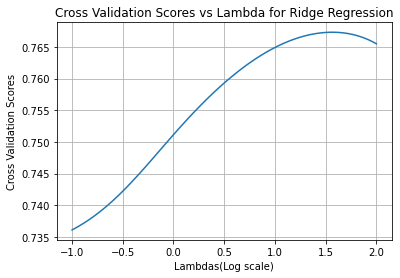

Max Validation score for lambda : 37.64935806792467


In [213]:
# write your code here and plot lambda vs cross validation score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

alphas = np.logspace(-1,2,100)
cross_val_scores_avg_list = []

for a in alphas :
    ridge_reg = Ridge(a , max_iter = 1e4)
    #score = cross_val_score(ridge_reg, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
    score = cross_val_score(ridge_reg, X_train, y_train, cv=5)
    cross_val_scores_avg_list.append(score.mean())

plt.figure(0)
plt.plot(np.linspace(-1,2,100),cross_val_scores_avg_list)
plt.grid()
plt.xlabel('Lambdas(Log scale)')
plt.ylabel('Cross Validation Scores')
plt.title('Cross Validation Scores vs Lambda for Ridge Regression')
plt.show()

opt_alpha_ridge = alphas[cross_val_scores_avg_list.index(max(cross_val_scores_avg_list))]
print('Max Validation score for lambda :',alphas[cross_val_scores_avg_list.index(max(cross_val_scores_avg_list))])

Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [215]:
# write your code here print cross validation score
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
score = cross_val_score(linear_reg, X_train, y_train, cv=5)

print('score :',score.mean())

score : 0.7319127091470774


Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


ANSWER

Among the most important features are features such as the number of fireplaces, number of bedrooms and overall quality.

When comparing both the coefficients of Lasso and Ridge Regression, we can see that the lasso regression has the ability to set the coefficients of features to zero unlike ridge which doesn't set them to zero. This aids the lasso regression in terms of feature selection.

From the test errors, the order of MSE is as follows : MSE(ridge) < MSE(Lasso) < MSE(Linear)

In [218]:
# predict on test data which you  splitted earlier, print coefficients of the learned model, Mean square error. Report the model which gives the least MSE. Also commenton important features
from sklearn.metrics import mean_squared_error

lasso_reg_opt = Lasso(opt_alpha_lasso , max_iter = 1e5)
lasso_reg_opt.fit(X_train , y_train)

ridge_reg_opt = Ridge(opt_alpha_ridge , max_iter = 1e5)
ridge_reg_opt.fit(X_train , y_train)

linear_reg.fit(X_train,y_train)

lasso_test_err = mean_squared_error(y_test , lasso_reg_opt.predict(X_test))
ridge_test_err = mean_squared_error(y_test , ridge_reg_opt.predict(X_test))
linear_test_err = mean_squared_error(y_test , linear_reg.predict(X_test))

print('Lasso Test Error :',lasso_test_err)
print('Ridge Test Error :',ridge_test_err)
print('Linear Regression Test Error :',linear_test_err)

Lasso Test Error : 1379208206.3329406
Ridge Test Error : 1360214643.7518377
Linear Regression Test Error : 1380512172.4163766


In [219]:
print('Lasso Weights : ')
print(lasso_reg_opt.coef_)

Lasso Weights : 
[-1.83777177e+02  3.95698859e-01  1.85009511e+04  3.43217883e+03
  3.14327053e+02  1.73956347e+02  1.45482300e+01  0.00000000e+00
  2.23326227e+00  1.70020848e+00  4.35343173e+01  4.19466518e+01
  3.70975354e+01  5.61150530e+00  7.87748942e+03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -6.81667527e+03 -0.00000000e+00
  3.80973026e+03  3.75923910e+03  7.93763022e+03  1.14207061e+01
  2.72326780e+01  3.22330337e-01  1.10217511e+01  3.89473057e+01
  6.45238214e+01 -3.25712292e+01 -8.76763659e-01 -3.10411985e+02
 -2.06714361e+02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.18964477e+04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.18667350e+03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  7.04616550e+01
  1.5920

In [220]:
print('Ridge Weights : ')
print(ridge_reg_opt.coef_)

Ridge Weights : 
[-1.76219642e+02  3.60274788e-01  1.75400372e+04  4.23337272e+03
  3.28783030e+02  1.58241795e+02  1.12499024e+01 -3.55298331e+00
 -1.03907744e+00  6.65784160e+00  1.35987756e+01  1.19590530e+01
  8.27212845e+00  3.38299566e+01  8.32636725e+03 -1.65450854e+03
  1.88515134e+03 -3.28487149e+01 -7.34984807e+03 -4.72545002e+03
  4.54396068e+03  4.62349282e+03  8.09234815e+03  1.12224000e+01
  2.56548657e+01 -2.63746179e+00  1.24623110e+01  3.65322201e+01
  6.23365118e+01 -3.09084118e+01 -8.78972294e-01 -3.29345735e+02
 -4.45876052e+02 -1.11600124e+03  1.11600124e+03 -4.61033633e+02
 -2.75004776e+03  9.97782748e+03 -1.43609109e+03 -3.49796926e+03
 -2.85567807e+03  2.09836803e+02  7.20232437e+01  7.41132286e+02
  1.70038274e+03 -1.18259280e+02  4.23184673e+03  9.38211403e+02
 -6.25810792e+03 -4.37993032e+02  5.70665641e+00 -6.17872939e+01
  2.79421843e+03 -2.79421843e+03  4.30346784e+03  5.99261710e+02
 -2.75201485e+03 -1.06206427e+02 -2.04450828e+03  2.17431692e+03
  7.0697

In [221]:
print('Linear Regression Weights : ')
print(linear_reg.coef_)

Linear Regression Weights : 
[-1.74568153e+02  4.62215679e-01  1.75946170e+04  4.49126494e+03
  3.35758423e+02  1.38787487e+02  1.23820850e+01 -3.61886668e+00
 -1.35368709e+00  7.40953147e+00  1.48716788e+01  1.16551313e+01
  8.86312893e+00  3.53899398e+01  8.70470243e+03 -3.59843191e+03
  1.75539035e+03  2.52320829e+02 -8.30425435e+03 -1.11199949e+04
  5.00594475e+03  3.90686194e+03  8.40979468e+03  8.96186607e+00
  2.07183504e+01 -4.75805982e+00  1.23633377e+01  2.22391337e+01
  5.69818720e+01 -2.52702996e+01 -4.32829883e-01 -2.86460251e+02
 -5.12612923e+02 -1.20147176e+04  1.20147176e+04 -2.13446314e+03
 -2.56925796e+03  1.03237522e+04 -1.23862111e+04  3.35670249e+03
 -1.43139957e+04  2.54456727e+03  3.52452977e+03  1.16543762e+04
  5.40585187e+04  2.94019485e+03  1.47282368e+04  4.78407434e+04
 -1.26933264e+05 -7.61125397e+03  1.73266692e+04 -2.34984512e+03
  5.08869102e+03 -5.08869102e+03  4.32838471e+03 -8.73584827e+02
 -3.75892452e+03  2.67682746e+03 -2.37270282e+03  1.34931023e

In [232]:
coef_df = pd.DataFrame({'Coefficient':abs(lasso_reg_opt.coef_)},index = onehot_encoded_dataset.columns)

In [237]:
print('Important Features are')
print(coef_df.sort_values('Coefficient')[-10:])

Important Features are
                  Coefficient
Fireplaces        3759.239103
TotRmsAbvGrd      3809.730262
LandContour_Bnk   5108.288645
HeatingQC_Ex      5186.673498
BedroomAbvGr      6816.675271
BsmtFullBath      7877.489419
GarageCars        7937.630221
Condition1_Norm  11896.447704
LandContour_HLS  13070.399598
OverallQual      18500.951101
